In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
import seaborn


In [2]:
data = pd.read_csv('dog_rates_tweets.csv')

In [3]:
datanew = data['text'].str.contains(r'\D0*([0-9]|1[0-9]|2[0-5])/10')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [4]:
data = data[datanew]

In [5]:
dates = pd.to_datetime(data['created_at'])

In [6]:
ratings = data['text'].str.extract(r'\D0*([0-9]|1[0-9]|2[0-5])/10')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [7]:
data['ratings'] = ratings

In [8]:
data['dates'] = dates

In [9]:
data['timestamp'] = data['dates'].apply(lambda x: x.timestamp())

In [10]:
data['ratings'] = data['ratings'].apply(lambda x: float(x))

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['timestamp'].values, data['ratings'] )
print('pvalue is : ',p_value)

pvalue is :  4.68621924416e-74


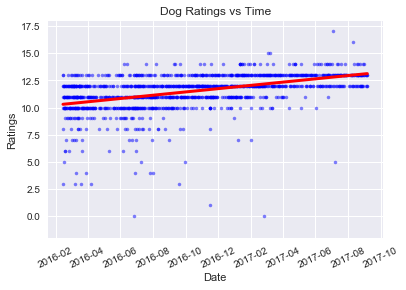

In [12]:
#plt.figure(1)
seaborn.set()
plt.plot( data['dates'].values, data['ratings'].values, 'b.', alpha=0.5)
#plt.figure(1)
plt.plot(data['dates'].values, slope * data['timestamp'].values + intercept , '-r', label='fitted line', linewidth=3)
plt.ylim(-2,18)
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.xticks(rotation=25)
plt.title('Dog Ratings vs Time')
plt.show()

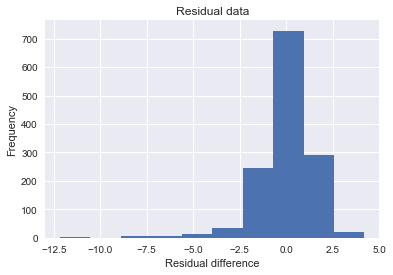

In [13]:
seaborn.set()
plt.hist(data['ratings'].values - (slope * data['timestamp'].values + intercept))
plt.title('Residual data')
plt.xlabel('Residual difference')
plt.ylabel('Frequency')
plt.show()